In [4]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [5]:
# IMPORT THƯ VIỆN CẦN THIẾT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
# NẠP DỮ LIỆU
df = pd.read_csv("Data_Python_ST3/BT2/mushrooms.csv")
print("Kích thước dữ liệu:", df.shape)
print(df.head())

Kích thước dữ liệu: (8124, 23)
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w  

In [7]:
# KHẢO SÁT DỮ LIỆU
print("\nThông tin dữ liệu:")
print(df.info())
print("\nCác giá trị null:")
print(df.isnull().sum())


Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stal

In [8]:
# MÃ HÓA DỮ LIỆU PHÂN LOẠI
# Tất cả các cột là dạng categorical, dùng LabelEncoder cho mỗi cột
label_encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Biến mục tiêu (class): 0 = edible (ăn được), 1 = poisonous (độc)
X = df.drop('class', axis=1)
y = df['class']

In [9]:
# CHIA DỮ LIỆU TRAIN / TEST
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
# XÂY DỰNG MÔ HÌNH NAIVE BAYES
# Vì toàn bộ feature là categorical nên dùng CategoricalNB
model = CategoricalNB()
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

In [11]:
# ĐÁNH GIÁ KẾT QUẢ
print("\n=== NAIVE BAYES TRÊN DỮ LIỆU MUSHROOM ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


=== NAIVE BAYES TRÊN DỮ LIỆU MUSHROOM ===
Accuracy: 0.9507692307692308
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       843
           1       0.99      0.91      0.95       782

    accuracy                           0.95      1625
   macro avg       0.96      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



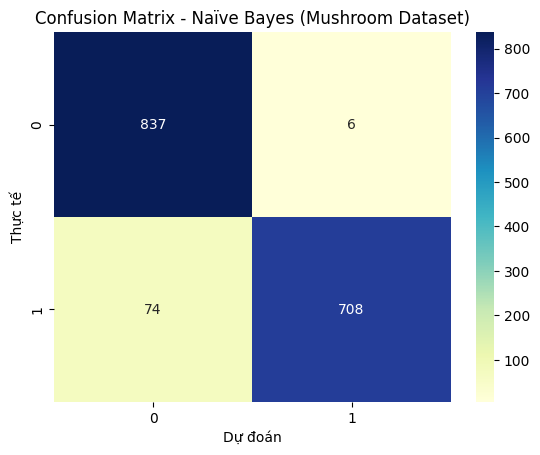

In [12]:
# CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - Naïve Bayes (Mushroom Dataset)")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

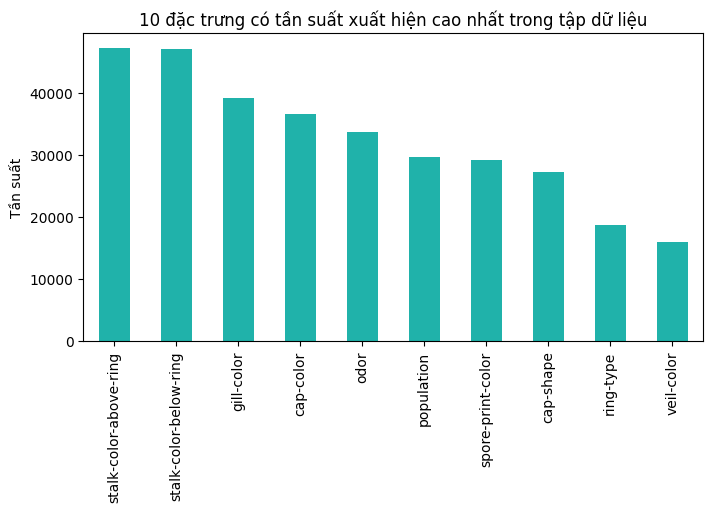

In [13]:

# KIỂM TRA XEM FEATURE NÀO QUAN TRỌNG
# Tính toán tỉ lệ phần trăm các đặc trưng chính (vd: frequency-based insight)
feature_counts = X.sum().sort_values(ascending=False)
plt.figure(figsize=(8,4))
feature_counts.head(10).plot(kind='bar', color='lightseagreen')
plt.title("10 đặc trưng có tần suất xuất hiện cao nhất trong tập dữ liệu")
plt.ylabel("Tần suất")
plt.show()